## Load `pybhpt`

In [1]:
from pybhpt.geo import KerrGeodesic
from pybhpt.teuk import TeukolskyMode
from pybhpt.hertz import HertzMode
from pybhpt.hertz import available_gauges
import numpy as np
print(available_gauges)

['IRG', 'ORG', 'SAAB0', 'SAAB4', 'ASAAB0', 'ASAAB4']


### Calculate background geodesic

In [2]:
a, p, e, x, nsamples = (0.9, 8., 0.2, 0.9, 2**9)
geo = KerrGeodesic(a, p, e, x, nsamples)

### Construct $\psi_4$

In [3]:
s, j, m, k, n = (-2, 2, 2, 1, 3)
teuk = TeukolskyMode(-2, j, m, k, n, geo)
teuk.solve(geo)

### Produce Hertz potentials $\Phi$ from $\psi_4$

In [4]:
rmin, rmax = geo.radialpoints[[0, -1]]
rinner = np.linspace(3., rmin - 0.001, 200)
rupper = np.linspace(rmax + 0.001, 30, 200)
r = np.concatenate((rinner, rupper))

phi = {}; PhiOfR = {}
for gauge in available_gauges:
    phi[gauge] = HertzMode(teuk, gauge)
    phi[gauge].solve()
    PhiOfR[gauge] = phi[gauge](r)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)
mpl.rc('font', **{'size' : 14})

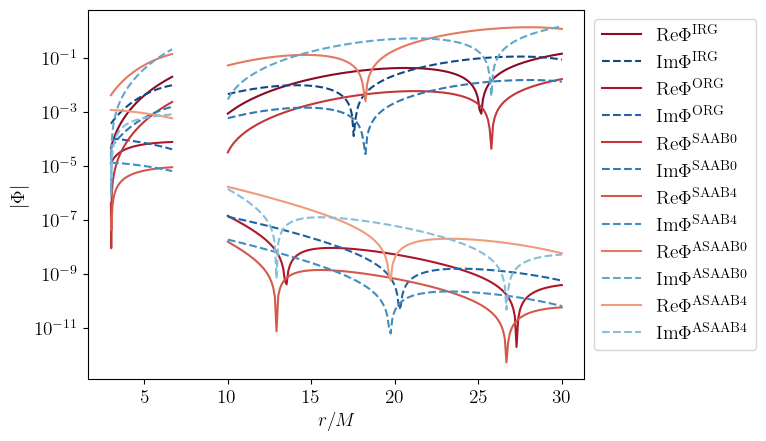

In [6]:
colors = mpl.colormaps["RdBu"](np.linspace(0.05, 0.95, 20))
for i, gauge in enumerate(available_gauges):
    plt.plot(rinner, np.abs(PhiOfR[gauge].real)[:200], label = "$\mathrm{Re}\Phi^\mathrm{"+gauge+"}$", color = colors[i])
    plt.plot(rupper, np.abs(PhiOfR[gauge].real)[200:], color = colors[i])
    plt.plot(rinner, np.abs(PhiOfR[gauge].imag)[:200], '--', label = "$\mathrm{Im}\Phi^\mathrm{"+gauge+"}$", color = colors[-i-1])
    plt.plot(rupper, np.abs(PhiOfR[gauge].imag)[200:], '--', color = colors[-i-1])
plt.yscale('log')
plt.ylabel("$|\Phi|$")
plt.xlabel("$r/M$")
plt.legend(bbox_to_anchor = (1., 1.))
plt.show()

### Evaluate metric coefficients

In [7]:
from pybhpt.metric import MetricCoefficients

th = np.array([0.5*np.pi])
habIRG = MetricCoefficients("IRG", a, r, th)
habORG = MetricCoefficients("ORG", a, r, th)

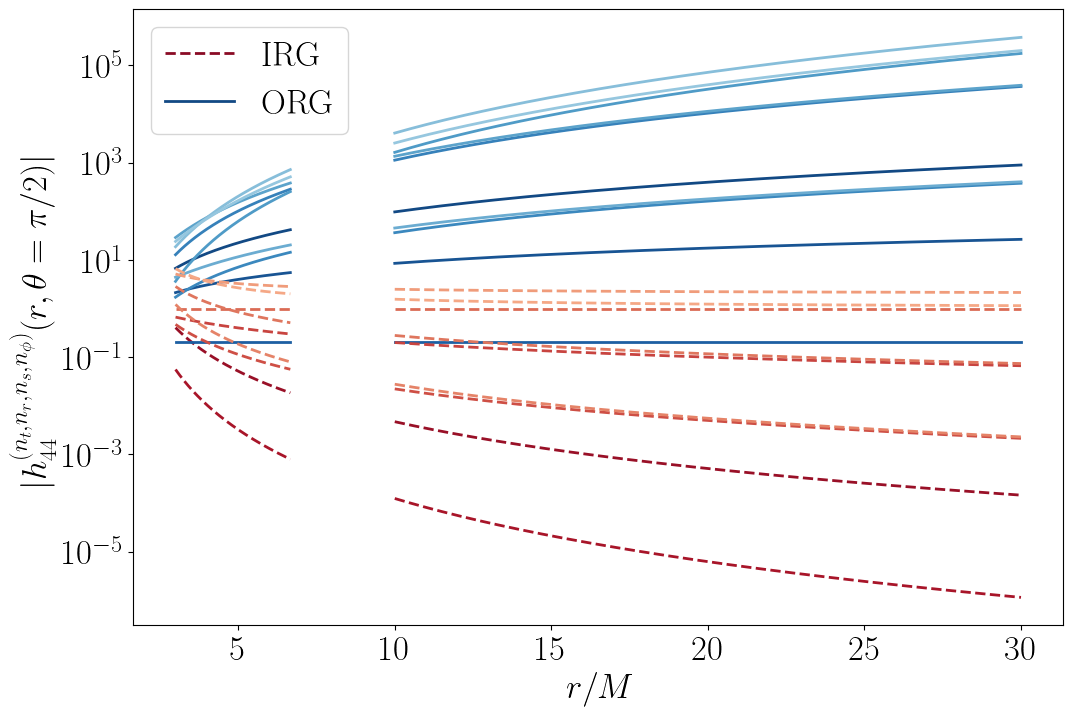

In [8]:
mpl.rc('font', **{'size' : 25})
plt.figure(figsize=(12,8))
colors = mpl.colormaps["RdBu"](np.linspace(0.05, 0.95, 50))
i = 0
for ai in range(3):
    for bi in range(3):
        for ci in range(3):
            for di in range(3):
                if ai + bi + ci + di <= 2:
                    if i == 0:
                        plt.plot(rinner, np.abs(habIRG(4, 4, ai, bi, ci, di)[:200, 0]), '--', color = colors[i], label="IRG", linewidth = 2)
                        plt.plot(rinner, np.abs(habORG(4, 4, ai, bi, ci, di)[:200, 0]), color = colors[-i-1], label="ORG", linewidth = 2)
                        plt.plot(rupper, np.abs(habIRG(4, 4, ai, bi, ci, di)[200:, 0]), '--', color = colors[i], linewidth = 2)
                        plt.plot(rupper, np.abs(habORG(4, 4, ai, bi, ci, di)[200:, 0]), color = colors[-i-1], linewidth = 2)
                    else:
                        plt.plot(rinner, np.abs(habIRG(4, 4, ai, bi, ci, di)[:200, 0]), '--', color = colors[i], linewidth = 2)
                        plt.plot(rinner, np.abs(habORG(4, 4, ai, bi, ci, di)[:200, 0]), color = colors[-i-1], linewidth = 2)
                        plt.plot(rupper, np.abs(habIRG(4, 4, ai, bi, ci, di)[200:, 0]), '--', color = colors[i], linewidth = 2)
                        plt.plot(rupper, np.abs(habORG(4, 4, ai, bi, ci, di)[200:, 0]), color = colors[-i-1], linewidth = 2)
                    i += 1
plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.xlabel('$r/M$')
plt.ylabel(r'$|h_{44}^{(n_t,n_r,n_s,n_\phi)}(r, \theta = \pi/2)|$')
plt.show()